In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress

In [2]:
vaccination = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=30").json()
# pprint(vaccination)
len(vaccination)

213

In [3]:
vaccine_days = []

vaccine_keys = vaccination[0]["timeline"].keys()

for value in vaccine_keys:
    vaccine_days.append(value)

# vaccine_days

In [4]:
country = []
vaccine =[]
v_date = []
for i in range(len(vaccination)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine.append(vaccination[i]["timeline"][j])
            country.append(vaccination[i]["country"])
            v_date.append(j)
        except:
            pass



In [5]:
len(country)

6367

In [6]:
len(vaccine)

6367

In [7]:
len(v_date)

6367

In [9]:
world_vaccination_df = pd.DataFrame({
                                "Country" : country,
                                "Date" : v_date,
                                "Vaccination_count" : vaccine
    
})

# world_vaccination_df

In [10]:
world_data = requests.get("https://disease.sh/v3/covid-19/historical/").json()
# pprint(world_data)

In [11]:
len(world_data)

279

In [12]:
world_days = []

world_keys = world_data[0]["timeline"]['cases'].keys()

for value in world_keys:
    world_days.append(value)

# world_days

In [13]:
country = []
cases =[]
deaths = []
recovered = []
w_date = []
for i in range(len(world_data)): 
       
    
    for j in world_days:
        
        try:
             
            cases.append(world_data[i]['timeline']['cases'][j])
            deaths.append(world_data[i]['timeline']['deaths'][j])
            recovered.append(world_data[i]['timeline']['recovered'][j])
            country.append(world_data[i]["country"])
            w_date.append(j)
        except:
            pass



In [14]:
len(cases)

8370

In [15]:
len(deaths)

8370

In [16]:
len(recovered)

8370

In [17]:
len(country)

8370

In [18]:
len(w_date)

8370

In [19]:
world_covid_df = pd.DataFrame({
                              
                            
                                "Country" : country,
                                "Date" : w_date,
                                "Cases" : cases,
                                "Deaths" : deaths,
                                "Recovered" : recovered
                                
    
})

# world_covid_df.head(20)

In [20]:
covid_df = pd.merge(world_covid_df,world_vaccination_df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
#covid_df

In [21]:
# Realized there were a whole bunch of duplicates
covid_df_duplicates = covid_df[covid_df.duplicated(['Country','Date'])]
#len(covid_df_duplicates)

In [22]:
# Sorted the DF by case #s
covid_df_duplicates = covid_df.groupby(['Country']).count().sort_values('Cases', ascending = False)
#covid_df_duplicates

In [23]:
covid_df_duplicates = covid_df.sort_values(['Country','Date','Cases'])
#covid_df_duplicates

In [24]:
len(covid_df_duplicates)

7927

In [25]:
# Dropped the duplicates, keeping the value for each country corresponding to the largest reported number of cases for 
# that day under the assumption that it would be the final and most accurate report for the day. 
# China was duplicated more than any other country, possibly it was updated many times throughout each day. 
covid_df_duplicates = covid_df.sort_values(['Country','Date','Cases']).drop_duplicates(subset=["Country","Date"],keep="last")
#covid_df_duplicates

In [26]:
#df['Col'] = df['Col'].dt.strftime('%d-%m%Y')
type(covid_df_duplicates['Date'])

pandas.core.series.Series

In [27]:
# Discovered that the countries would not group in correct date order because the date needed to be formatted. 
# So we did that.
covid_df_duplicates['Date']=pd.to_datetime(covid_df_duplicates.Date)

#covid_df_duplicates['Date']=covid_df_duplicates['Date'].dt.strftiome('%m/%d/%Y')
covid_df_duplicates

Country       Date     Cases  Deaths  \
0                          Afghanistan 2021-07-01    120216    4962   
9                          Afghanistan 2021-07-10    131586    5561   
10                         Afghanistan 2021-07-11    131586    5561   
11                         Afghanistan 2021-07-12    134653    5791   
12                         Afghanistan 2021-07-13    134653    5791   
13                         Afghanistan 2021-07-14    136643    5923   
14                         Afghanistan 2021-07-15    137853    5983   
15                         Afghanistan 2021-07-16    137853    5983   
16                         Afghanistan 2021-07-17    137853    5983   
17                         Afghanistan 2021-07-18    137853    5983   
18                         Afghanistan 2021-07-19    141489    6213   
1                          Afghanistan 2021-07-02    120216    4962   
19                         Afghanistan 2021-07-20    142414    6266   
20                         Afghanistan 2021-07-21    142414    6266   
21                         Afghanistan 2021-07-22    143183    6325   
22                         Afghanistan 2021-07-23    143439    6357   
23                         Afghanistan 2021-07-24    143439    6357   
24                         Afghanistan 2021-07-25    143439    6357   
25                         Afghanistan 2021-07-26    144285    6477   
26                         Afghanistan 2021-07-27    145008    6515   
27                         Afghanistan 2021-07-28    145552    6577   
28                         Afghanistan 2021-07-29    145996    6615   
2                          Afghanistan 2021-07-03    120216    4962   
29                         Afghanistan 2021-07-30    146523    6677   
3                          Afghanistan 2021-07-04    120216    4962   
4                          Afghanistan 2021-07-05    125937    5283   
5                          Afghanistan 2021-07-06    127464    5360   
6                          Afghanistan 2021-07-07    129021    5415   
7                          Afghanistan 2021-07-08    130113    5477   
8                          Afghanistan 2021-07-09    131586    5561   
30                             Albania 2021-07-01    132523    2456   
39                             Albania 2021-07-10    132587    2456   
40                             Albania 2021-07-11    132592    2456   
41                             Albania 2021-07-12    132597    2456   
42                             Albania 2021-07-13    132608    2456   
43                             Albania 2021-07-14    132616    2456   
44                             Albania 2021-07-15    132629    2456   
45                             Albania 2021-07-16    132647    2456   
46                             Albania 2021-07-17    132665    2456   
47                             Albania 2021-07-18    132686    2456   
48                             Albania 2021-07-19    132697    2456   
31                             Albania 2021-07-02    132526    2456   
49                             Albania 2021-07-20    132740    2456   
50                             Albania 2021-07-21    132763    2456   
51                             Albania 2021-07-22    132797    2456   
52                             Albania 2021-07-23    132828    2456   
53                             Albania 2021-07-24    132853    2456   
54                             Albania 2021-07-25    132875    2456   
55                             Albania 2021-07-26    132891    2456   
56                             Albania 2021-07-27    132922    2456   
57                             Albania 2021-07-28    132952    2457   
58                             Albania 2021-07-29    132999    2457   
32                             Albania 2021-07-03    132534    2456   
59                             Albania 2021-07-30    133036    2457   
33                             Albania 2021-07-04    132535    2456   
34                             Albania 2021-07-05    13

In [28]:
type(covid_df_duplicates)

pandas.core.frame.DataFrame

In [29]:
# New Dataframe with duplicates dropped and sorted by date. 
covid_df_duplicates=covid_df_duplicates.sort_values(['Country','Date'])
covid_df_duplicates

Country       Date     Cases  Deaths  \
0                          Afghanistan 2021-07-01    120216    4962   
1                          Afghanistan 2021-07-02    120216    4962   
2                          Afghanistan 2021-07-03    120216    4962   
3                          Afghanistan 2021-07-04    120216    4962   
4                          Afghanistan 2021-07-05    125937    5283   
5                          Afghanistan 2021-07-06    127464    5360   
6                          Afghanistan 2021-07-07    129021    5415   
7                          Afghanistan 2021-07-08    130113    5477   
8                          Afghanistan 2021-07-09    131586    5561   
9                          Afghanistan 2021-07-10    131586    5561   
10                         Afghanistan 2021-07-11    131586    5561   
11                         Afghanistan 2021-07-12    134653    5791   
12                         Afghanistan 2021-07-13    134653    5791   
13                         Afghanistan 2021-07-14    136643    5923   
14                         Afghanistan 2021-07-15    137853    5983   
15                         Afghanistan 2021-07-16    137853    5983   
16                         Afghanistan 2021-07-17    137853    5983   
17                         Afghanistan 2021-07-18    137853    5983   
18                         Afghanistan 2021-07-19    141489    6213   
19                         Afghanistan 2021-07-20    142414    6266   
20                         Afghanistan 2021-07-21    142414    6266   
21                         Afghanistan 2021-07-22    143183    6325   
22                         Afghanistan 2021-07-23    143439    6357   
23                         Afghanistan 2021-07-24    143439    6357   
24                         Afghanistan 2021-07-25    143439    6357   
25                         Afghanistan 2021-07-26    144285    6477   
26                         Afghanistan 2021-07-27    145008    6515   
27                         Afghanistan 2021-07-28    145552    6577   
28                         Afghanistan 2021-07-29    145996    6615   
29                         Afghanistan 2021-07-30    146523    6677   
30                             Albania 2021-07-01    132523    2456   
31                             Albania 2021-07-02    132526    2456   
32                             Albania 2021-07-03    132534    2456   
33                             Albania 2021-07-04    132535    2456   
34                             Albania 2021-07-05    132537    2456   
35                             Albania 2021-07-06    132544    2456   
36                             Albania 2021-07-07    132557    2456   
37                             Albania 2021-07-08    132565    2456   
38                             Albania 2021-07-09    132580    2456   
39                             Albania 2021-07-10    132587    2456   
40                             Albania 2021-07-11    132592    2456   
41                             Albania 2021-07-12    132597    2456   
42                             Albania 2021-07-13    132608    2456   
43                             Albania 2021-07-14    132616    2456   
44                             Albania 2021-07-15    132629    2456   
45                             Albania 2021-07-16    132647    2456   
46                             Albania 2021-07-17    132665    2456   
47                             Albania 2021-07-18    132686    2456   
48                             Albania 2021-07-19    132697    2456   
49                             Albania 2021-07-20    132740    2456   
50                             Albania 2021-07-21    132763    2456   
51                             Albania 2021-07-22    132797    2456   
52                             Albania 2021-07-23    132828    2456   
53                             Albania 2021-07-24    132853    2456   
54                             Albania 2021-07-25    132875    2456   
55                             Albania 2021-07-26    13

In [31]:
len(covid_df_duplicates[covid_df_duplicates['Country']=="China"]['Cases'])

30

In [32]:
top_country=covid_df_duplicates.groupby(['Country','Date']).sum()
top_country

Cases  Deaths  Recovered  \
Country                          Date                                      
Afghanistan                      2021-07-01    120216    4962      71924   
                                 2021-07-02    120216    4962      72700   
                                 2021-07-03    120216    4962      73635   
                                 2021-07-04    120216    4962      74480   
                                 2021-07-05    125937    5283      75314   
                                 2021-07-06    127464    5360      76218   
                                 2021-07-07    129021    5415      77280   
                                 2021-07-08    130113    5477      78521   
                                 2021-07-09    131586    5561      79446   
                                 2021-07-10    131586    5561      80226   
                                 2021-07-11    131586    5561      81077   
                                 2021-07-12    134653    5791      82586   
                                 2021-07-13    134653    5791      82586   
                                 2021-07-14    136643    5923      82586   
                                 2021-07-15    137853    5983      82586   
                                 2021-07-16    137853    5983      82586   
                                 2021-07-17    137853    5983      82586   
                                 2021-07-18    137853    5983      82586   
                                 2021-07-19    141489    6213      82586   
                                 2021-07-20    142414    6266      82586   
                                 2021-07-21    142414    6266      82586   
                                 2021-07-22    143183    6325      82586   
                                 2021-07-23    143439    6357      82586   
                                 2021-07-24    143439    6357      82586   
                                 2021-07-25    143439    6357      82586   
                                 2021-07-26    144285    6477      82586   
                                 2021-07-27    145008    6515      82586   
                                 2021-07-28    145552    6577      82586   
                                 2021-07-29    145996    6615      82586   
                                 2021-07-30    146523    6677      82586   
Albania                          2021-07-01    132523    2456     130014   
                                 2021-07-02    132526    2456     130018   
                                 2021-07-03    132534    2456     130023   
                                 2021-07-04    132535    2456     130027   
                                 2021-07-05    132537    2456     130029   
                                 2021-07-06    132544    2456     130033   
                                 2021-07-07    132557    2456     130035   
                                 2021-07-08    132565    2456     130037   
                                 2021-07-09    132580    2456     130043   
                                 2021-07-10    132587    2456     130047   
                                 2021-07-11    132592    2456     130050   
                                 2021-07-12    132597    2456     130052   
                                 2021-07-13    132608    2456     130053   
                                 2021-07-14    132616    2456     130059   
                                 2021-07-15    132629    2456     130061   
                                 2021-07-16    132647    2456     130067   
                                 2021-07-17    132665    2456     130072   
                                 2021-07-18    132686    2456     130074   
                                 2021-07-19    132697    2456     130081   
                                 2021-07-20    132740    2456     130086   
                                 2021-07-21    132763    2456     130097   
                    

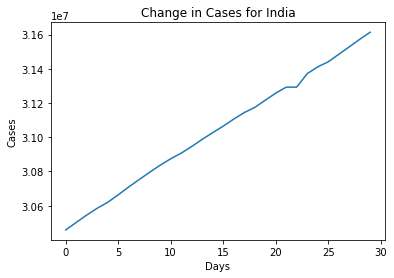

In [43]:
x_axis_data=np.arange(len(covid_df_duplicates[covid_df_duplicates['Country']=="India"])) #['Date']))
y_axis_data =covid_df_duplicates[covid_df_duplicates['Country']=="India"]['Cases']
#y_axis_data2 =(covid_df_duplicates[covid_df_duplicates['Country']=="India"]['Vaccination_count'])
plt.plot(x_axis_data,y_axis_data) #,y_axis_data2,)  
plt.title("Change in Cases for India")
plt.xlabel("Days")
plt.ylabel("Cases")
plt.show()

In [44]:
country_ave=covid_df_duplicates.groupby(['Country']).mean()
country_ave

Cases         Deaths     Recovered  \
Country                                                                       
Afghanistan                       1.357566e+05    5883.500000  8.033183e+04   
Albania                           1.326960e+05    2456.100000  1.300811e+05   
Algeria                           1.521040e+05    3921.900000  1.047396e+05   
Andorra                           1.425270e+04     127.033333  1.387753e+04   
Angola                            4.060637e+04     952.700000  3.469093e+04   
Antigua and Barbuda               1.272567e+03      42.233333  1.224733e+03   
Argentina                         4.715214e+06  100492.666667  4.344138e+06   
Armenia                           2.272009e+05    4558.466667  2.181391e+05   
Australia                         2.079893e+04     820.000000  1.989403e+04   
Austria                           6.534415e+05   10724.866667  6.396298e+05   
Azerbaijan                        3.384391e+05    4992.266667  3.312261e+05   
Bahamas                           1.343243e+04     264.033333  1.201110e+04   
Bahrain                           2.676081e+05    1375.266667  2.649885e+05   
Bangladesh                        1.072834e+06   17390.000000  9.206741e+05   
Barbados                          4.225733e+03      47.733333  4.076933e+03   
Belarus                           4.316934e+05    3300.000000  4.251716e+05   
Belgium                           1.102571e+06   25207.900000  0.000000e+00   
Belize                            1.368220e+04     331.700000  1.300730e+04   
Benin                             8.262033e+03     106.033333  8.060200e+03   
Bhutan                            2.348345e+03       1.517241  2.056966e+03   
Bolivia                           4.584939e+05   17348.166667  3.863153e+05   
Bosnia                            2.052648e+05    9669.866667  1.864354e+05   
Botswana                          8.601107e+04    1297.866667  7.565890e+04   
Brazil                            1.926843e+07  538728.966667  1.717049e+07   
Brunei                            2.902000e+02       3.000000  2.597333e+02   
Bulgaria                          4.229783e+05   18157.500000  3.969792e+05   
Burkina Faso                      1.352493e+04     168.566667  1.333467e+04   
Cabo Verde                        3.318373e+04     292.966667  3.234470e+04   
Cambodia                          6.461310e+04    1023.333333  5.675903e+04   
Cameroon                          8.132907e+04    1328.133333  3.526100e+04   
Canada                            5.552097e+05    9231.200000  0.000000e+00   
Central African Republic          7.143967e+03      98.000000  6.859000e+03   
Chad                              4.960300e+03     174.000000  4.778567e+03   
Chile                             1.592412e+06   34169.566667  1.542536e+06   
China                             6.818583e+04    4512.000000  6.365280e+04   
Colombia                          4.569814e+06  114592.566667  4.313465e+06   
Comoros                           3.995633e+03     146.500000  3.814067e+03   
Congo                             1.292403e+04     171.266667  1.170800e+04   
Costa Rica                        3.877598e+05    4847.433333  3.119741e+05   
Croatia                           3.614306e+05    8233.733333  3.524658e+05   
Cuba                              2.713828e+05    1843.500000  2.363859e+05   
Cyprus                            8.878893e+04     389.133333  3.906100e+04   
Czechia                           1.670380e+06   30335.633333  1.637643e+06   
Côte d'Ivoire                     4.909210e+04     320.166667  4.840197e+04   
DRC                               4.540780e+04     992.200000  2.895850e+04   
Denmark                           3.039886e+05    2540.666667  2.930678e+05   
Djibouti                          1.162293e+04     155.033333  1.145927e+04   
Dominica                          2.019000e+02       0.000000  1.942333e+02   
Dominican Republic                3.353895e+05    3903.733333  2.836584e+05   
Ecuador     

In [45]:
# Compute the Pearson correlation coefficient between Covid Cases and Vaccination Count worldwide
cases = country_ave.iloc[:,0]
vaccinations = country_ave.iloc[:,3]
correlation = st.pearsonr(cases,vaccinations)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.33


The correlation between both factors is 0.33


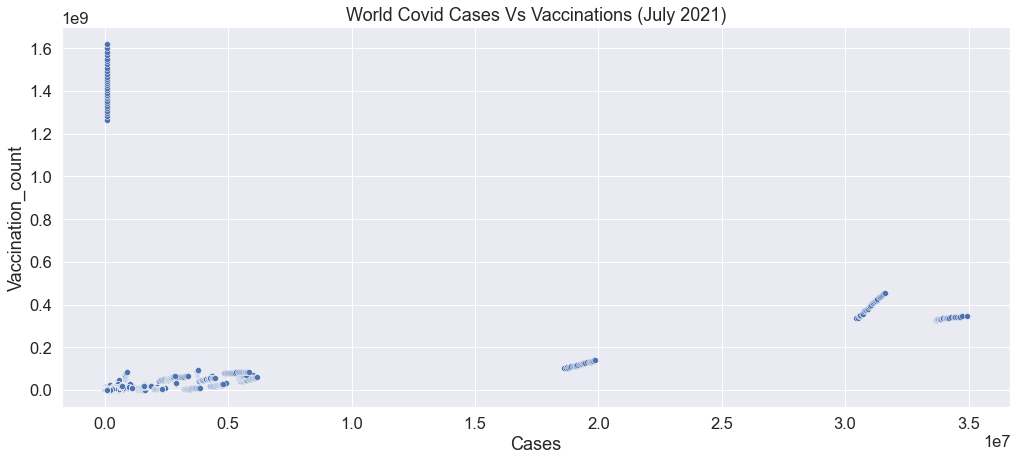

In [68]:
fig, ax = plt.subplots(figsize=(17,7))
sns.scatterplot(data=covid_df_duplicates,
               x='Cases',
               y='Vaccination_count'
               ).set(title='World Covid Cases Vs Vaccinations (July 2021)')
#(slope, intercept, rvalue, pvalue, stderr) = linregress(ax,'Vaccination_count')
#regress_values = ax * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(ax,regress_values,"r-")
#plt.annotate(line_eq,(0,0.50),fontsize=15,color="red")
sns.set_style("white")
sns.set(font_scale = 1.5)
locs, labels = plt.xticks()
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.33
The p-value for cases and vaccination is 4.7508819567521136e-138


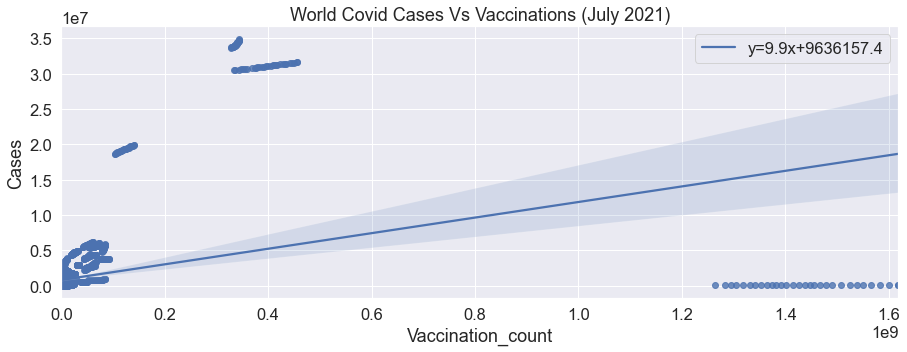

In [139]:
fig, ax = plt.subplots(figsize=(15,5))


# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = st.linregress(covid_df_duplicates['Cases'],
                                                            covid_df_duplicates['Vaccination_count'])

p=sns.regplot(data=covid_df_duplicates,
               x='Vaccination_count',
               y='Cases',
               line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}
).set(title='World Covid Cases Vs Vaccinations (July 2021)')
    
# plot legend
ax.legend()
leg=ax.get_legend()
L_labels=leg.get_texts()
                                  
sns.set_style(style="white")
sns.set(font_scale = 1.5)
locs, labels = plt.xticks()
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The p-value for cases and vaccination is {p_value}')
plt.show()

In [134]:
p_value

4.7508819567521136e-138

In [ ]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population1.vertebrae, population2.vertebrae, equal_var=False)

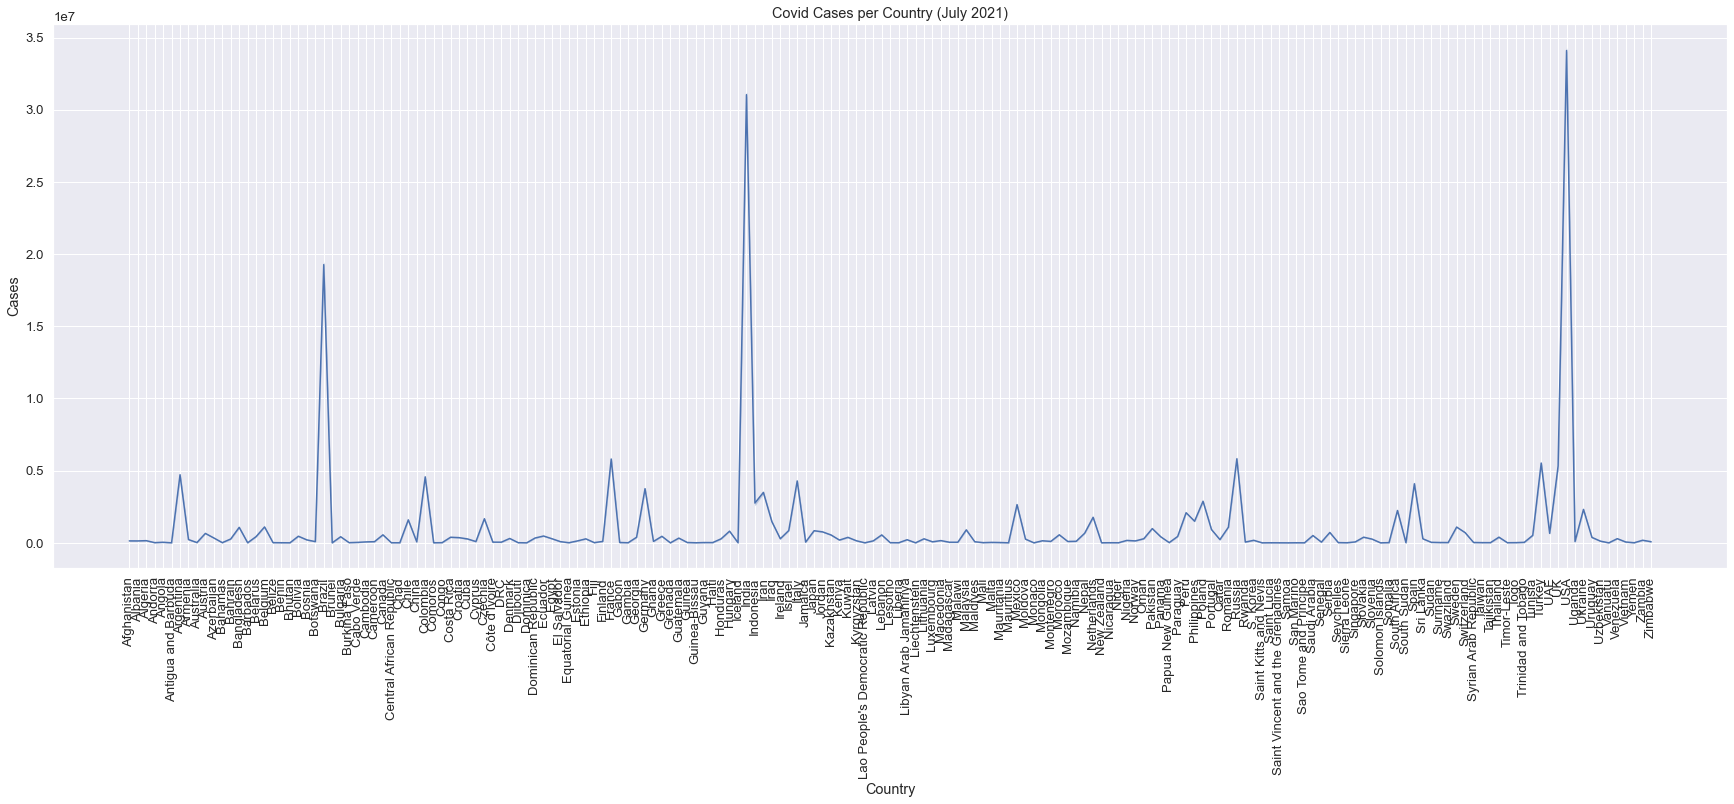

In [129]:
with sns.plotting_context("notebook",font_scale=1.2):
    fig, ax = plt.subplots(figsize=(30,10))
    sns.lineplot(data=covid_df_duplicates,
                x='Country',
                y='Cases'
                ).set(title='Covid Cases per Country (July 2021)')
    sns.set_style("white")
    sns.set(font_scale = 2)
    locs, labels = plt.xticks()

    plt.setp(labels, rotation=90)
    # plt.subplots_adjust(bottom=)

plt.show()

In [52]:
cases_time=(covid_df_duplicates
           .assign(USA=np.where(covid_df_duplicates.Country=='USA','USA','World'))
           .filter(['Date','Cases','USA'])
           .groupby(['Date','USA'])
           .agg('sum')
           .reset_index()
           )

In [53]:
#print(cases_time)

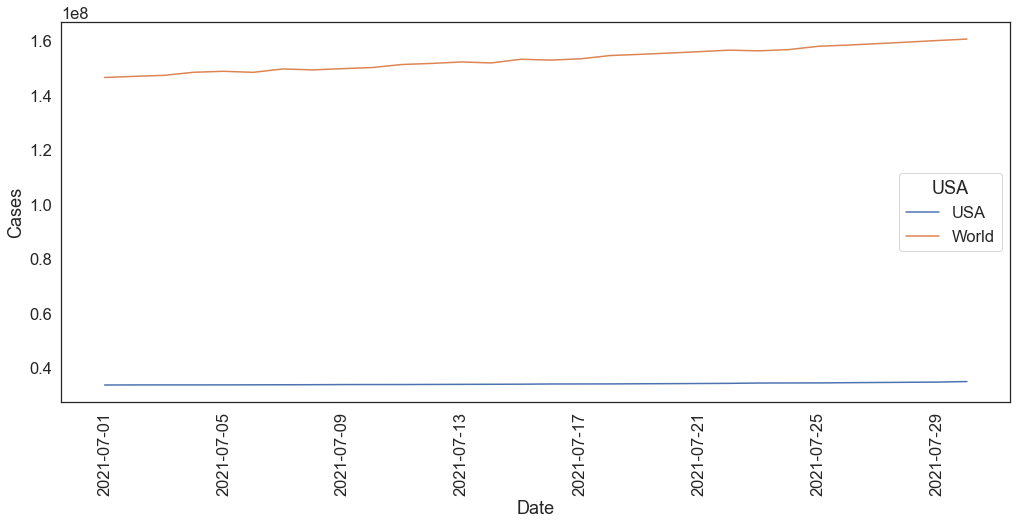

In [119]:
fig, ax = plt.subplots(figsize=(17,7))
sns.lineplot(data=cases_time,
            x='Date',
            y='Cases',
            hue='USA'
            )
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [55]:
cases_by_date_top_countries = (covid_df_duplicates
                           .filter(['Date','Country','Cases'])
                           .query('Country in ["USA","China","India","UK","Germany","France"] ')
                           .groupby(['Date','Country'])
                           .agg('sum')
                           .reset_index()
                           )

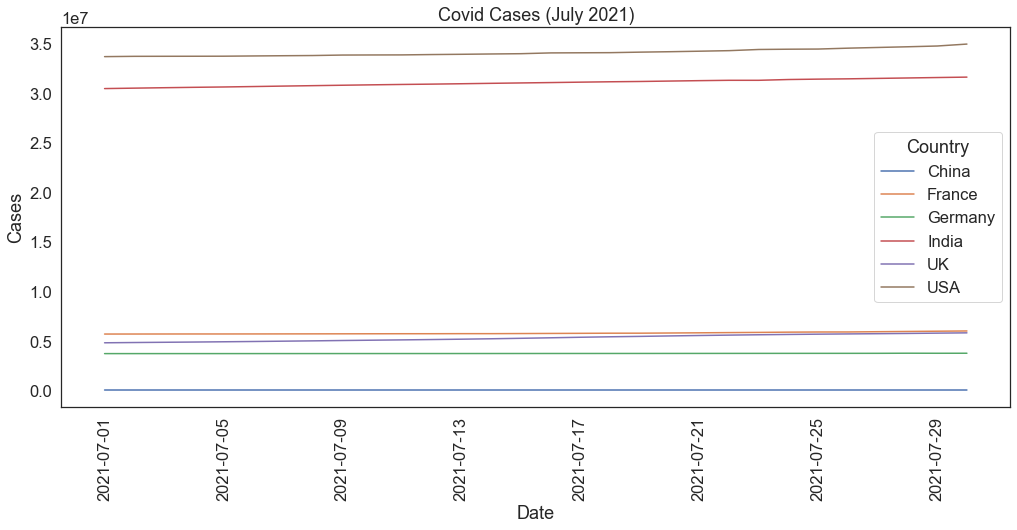

In [127]:
fig, ax = plt.subplots(figsize=(17,7))
sns.lineplot(data = cases_by_date_top_countries
             ,x = 'Date'
             ,y = 'Cases'
             ,hue = 'Country'
             ,legend=True
             ,ax=ax
             ).set(title='Covid Cases (July 2021)')
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [57]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = covid_df_duplicates.groupby(['Country'])#.sum().drop(['Deaths','Recovered','Vaccination_count'],axis=1)
confirmed_country.head()

Country       Date     Cases  Deaths  \
0                          Afghanistan 2021-07-01    120216    4962   
1                          Afghanistan 2021-07-02    120216    4962   
2                          Afghanistan 2021-07-03    120216    4962   
3                          Afghanistan 2021-07-04    120216    4962   
4                          Afghanistan 2021-07-05    125937    5283   
30                             Albania 2021-07-01    132523    2456   
31                             Albania 2021-07-02    132526    2456   
32                             Albania 2021-07-03    132534    2456   
33                             Albania 2021-07-04    132535    2456   
34                             Albania 2021-07-05    132537    2456   
60                             Algeria 2021-07-01    140075    3726   
61                             Algeria 2021-07-02    140550    3735   
62                             Algeria 2021-07-03    141007    3745   
63                             Algeria 2021-07-04    141471    3755   
64                             Algeria 2021-07-05    141966    3765   
90                             Andorra 2021-07-01     13918     127   
91                             Andorra 2021-07-02     13918     127   
92                             Andorra 2021-07-03     13918     127   
93                             Andorra 2021-07-04     13918     127   
94                             Andorra 2021-07-05     13918     127   
120                             Angola 2021-07-01     38965     903   
121                             Angola 2021-07-02     39089     906   
122                             Angola 2021-07-03     39172     910   
123                             Angola 2021-07-04     39230     913   
124                             Angola 2021-07-05     39300     915   
150                Antigua and Barbuda 2021-07-01      1264      42   
151                Antigua and Barbuda 2021-07-02      1264      42   
152                Antigua and Barbuda 2021-07-03      1264      42   
153                Antigua and Barbuda 2021-07-04      1264      42   
154                Antigua and Barbuda 2021-07-05      1264      42   
180                          Argentina 2021-07-01   4491551   94772   
181                          Argentina 2021-07-02   4512439   95382   
182                          Argentina 2021-07-03   4526473   95594   
183                          Argentina 2021-07-04   4535473   95904   
184                          Argentina 2021-07-05   4552750   96521   
210                            Armenia 2021-07-01    225221    4517   
211                            Armenia 2021-07-02    225339    4518   
212                            Armenia 2021-07-03    225464    4521   
213                            Armenia 2021-07-04    225553    4526   
214                            Armenia 2021-07-05    225606    4527   
246                          Australia 2021-07-01     20715     820   
254                          Australia 2021-07-02     20713     820   
262                          Australia 2021-07-03     20714     820   
270                          Australia 2021-07-04     20716     820   
278                          Australia 2021-07-05     20718     820   
480                            Austria 2021-07-01    650474   10706   
481                            Austria 2021-07-02    650569   10709   
482                            Austria 2021-07-03    650662   10709   
483                            Austria 2021-07-04    650737   10709   
484                            Austria 2021-07-05    650817   10713   
510                         Azerbaijan 2021-07-01    336122    4975   
511                         Azerbaijan 2021-07-02    336223    4977   
512                         Azerbaijan 2021-07-03    336318    4977   
513                         Azerbaijan 2021-07-04    336417    4978   
514                         Azerbaijan 2021-07-05    336479    4978   
540                            Bahamas 2021-07-01     1

In [58]:
distribution = covid_df.groupby(['Country','Cases']).sum().head()
#distribution = distribution.sort_values(['Cases'], ascending = False)
#d =distribution.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))
#d.set_title("Distribution between countries")
#distribution
type(distribution)

pandas.core.frame.DataFrame

In [ ]:
# Group by country and get average, sort by descending number cases. 
#covid_df_groupbys = covid_df_groupby.groupby(['Country']) #.count() #.sort_values('Cases', ascending = False)
#covid_df_groupbys

#top_ten_deaths = round(covid_df_groupby.head(10))
#covid_df_groupby.head(10)
#covid_time_df=covid_df.groupby('Country').mean()
#covid_time_df
#Ave_cases = covid_time_df['Cases']
#len(covid_time_df)

In [ ]:
#covid_df[covid_df['Country']=='New Zealand']

In [ ]:
# Group by country and get average, sort by descending number cases. 
covid_df_groupby = covid_df.groupby(['Country']).count().sort_values('Cases', ascending = False)
covid_df_groupby.head(10)


In [ ]:
#This is my entry

#covid_time_df=pd.DataFrame({
#    "Country":country,
#    "Ave Cases":Ave_cases
#})
#covid_time_df.reset_index(drop=True)
#new_df=pd.DataFrame(covid_time_df['Country']['Cases']).reset_index()

In [ ]:
vaccination1 = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1").json()
country = []
vc = []


for i in range(len(vaccination1)):
    c = vaccination1[i]['country']
    vc.append(vaccination1[i]['timeline']['7/29/21'])   
    country.append(c)

len(country)
len(vc)



In [ ]:
vaccine_count = pd.DataFrame({"Country" : country,
                               "Vaccination_count": vc  })

vaccine_count.head()

In [ ]:
country = []
vaccine1 =[]
v_date1 = []
for i in range(len(vaccination1)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine1.append(vaccination1[i]["timeline"][j])
            country.append(vaccination1[i]["country"])
            v_date1.append(j)
        except:
            pass

In [ ]:
url= "https://disease.sh/v3/covid-19/countries/"



world_active =[]
activePerOneMillion = []
cases = []
casesPerOneMillion = []
continent = []
w_country = []
lat = []
long = []
critical = []
criticalPerOneMillion = []
deaths = []
deathsPerOneMillion = []
population = []
recovered=[]
recoveredPerOneMillion = []
tests = []
testsPerOneMillion = []
todayCases = []
todayDeaths = []
todayRecovered = []
for c in country:
    try:
        response = requests.get(url + c).json()
        world_active.append(response['active'])
        activePerOneMillion.append(response['activePerOneMillion'])
        cases.append(response['cases'])
        casesPerOneMillion.append(response['casesPerOneMillion'])
        continent.append(response['continent'])
        w_country.append(response['country'])
        lat.append(response['countryInfo']['lat'])
        long.append(response['countryInfo']['long'])
        critical.append(response['critical'])
        criticalPerOneMillion.append(response['criticalPerOneMillion'])
        deaths.append(response['deaths'])
        deathsPerOneMillion.append(response['deathsPerOneMillion'])
        population.append(response['population'])
        recovered.append(response['recovered'])
        recoveredPerOneMillion.append(response['recoveredPerOneMillion'])
        tests.append(response['tests'])
        testsPerOneMillion.append(response['testsPerOneMillion'])
        todayCases.append(response['todayCases'])
        todayDeaths.append(response['todayDeaths'])
        todayRecovered.append(response['todayRecovered'])
    except:
        pass
        #print(f'{c} does not have data')


In [ ]:
daily_covid_df = pd.DataFrame({
                                "Active" : world_active,
                                #"ActivePerOneMillion" : activePerOneMillion,
                                "Total_cases" : cases,
                                #"Total_casesPerOneMillion" : casesPerOneMillion,
                                "Continent" : continent,                                
                                "Country" : w_country,
                                "Latitude" : lat,
                                "Longitude" : long,
                                "Critical" : critical,
                                #"CriticalPerOneMillion" : criticalPerOneMillion,
                                "Overall_deaths" : deaths,
                                #"Overall_deathsPerOneMillion" : deathsPerOneMillion,
                                "Population" : population,
                                "Recovered" : recovered,
                                #"RecoveredPerOneMillion" : recoveredPerOneMillion,
                                "Tests" : tests,
                                #"TestsPerOneMillion" : testsPerOneMillion,
                                "TodayCases" : todayCases,
                                "TodayDeaths" : todayDeaths,
                                "TodayRecovered" : todayRecovered,
                                
                                
})

daily_covid_df.head(2)

In [ ]:
today_df = pd.merge(daily_covid_df,vaccine_count)

today_df

In [ ]:
pop_df=today_df[['Country','Population']]
pop_df